In [2]:
##Happy said: remember the method!!!

import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model
import numpy as np
from tensorflow.keras.preprocessing import image

In [3]:
# Define paths for your dataset
train_dir = r'D:\MachineVisionDataSet\seminar\mvseminar-week-5\MV_Seminar Week 5\data_mv\train'
test_dir = r'D:\MachineVisionDataSet\seminar\mvseminar-week-5\MV_Seminar Week 5\data_mv\test'

In [4]:
# Image preprocessing and augmentation
train_datagen = ImageDataGenerator(
    rescale=1.0/255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2,  # Specify the validation split here
    fill_mode='nearest'
)

In [5]:
test_datagen = ImageDataGenerator(rescale=1.0/255)

# Load and preprocess the training and testing images
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(128, 128),
    batch_size=8,
    class_mode='categorical',
    subset='training'  # Use 'training' subset for training data
)

validation_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(128, 128),
    batch_size=32,
    class_mode='categorical',
    subset='validation'  # Use 'validation' subset for validation data
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(128, 128),
    batch_size=8,
    class_mode='categorical'
)

Found 39 images belonging to 3 classes.
Found 9 images belonging to 3 classes.
Found 24 images belonging to 3 classes.


In [18]:
# Build a neural network model, using Sequentail to build  
model = Sequential([
    ##define the input layer, 3 means three channel, using the flatten() to convert input matrix into one row vector
    Flatten(input_shape = (128, 128, 3)),
    ##define hidden layers, units and activate function
    Dense(units=500, activation='relu'),
    Dropout(0.2),
    Dense(units=250, activation='relu'),
    Dropout(0.2),
    ##define the output layer, 1 means it is a binary classfication, in this context, using sigmoid
    ##but this project is for thiree classes, so using 3 output layer, function is softmax
    Dense(units=3, activation='softmax')
    
])


In [19]:
# Display the model summary
## now display the model sturcture
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 49152)             0         
                                                                 
 dense_3 (Dense)             (None, 500)               24576500  
                                                                 
 dropout (Dropout)           (None, 500)               0         
                                                                 
 dense_4 (Dense)             (None, 250)               125250    
                                                                 
 dropout_1 (Dropout)         (None, 250)               0         
                                                                 
 dense_5 (Dense)             (None, 3)                 753       
                                                                 
Total params: 24,702,503
Trainable params: 24,702,503


In [20]:
# Compile the model
# complie means define the loss, the optimization, compile them together
# this step using Adam Boost to optimization
model.compile(optimizer = Adam(lr=0.001),
                        loss='categorical_crossentropy',
                         metrics=['accuracy']
             )

In [21]:
# Fit the model for training 
history = model.fit(train_generator, epochs=20, validation_data=validation_generator)

Epoch 1/20
5/5 [==============================] - 2s 234ms/step - loss: 51.2065 - accuracy: 0.3333 - val_loss: 43.4121 - val_accuracy: 0.3333
Epoch 2/20
5/5 [==============================] - 1s 189ms/step - loss: 25.5452 - accuracy: 0.3333 - val_loss: 20.7422 - val_accuracy: 0.4444
Epoch 3/20
5/5 [==============================] - 1s 187ms/step - loss: 25.4025 - accuracy: 0.2821 - val_loss: 6.9531 - val_accuracy: 0.3333
Epoch 4/20
5/5 [==============================] - 1s 184ms/step - loss: 17.3129 - accuracy: 0.3846 - val_loss: 11.7979 - val_accuracy: 0.4444
Epoch 5/20
5/5 [==============================] - 1s 186ms/step - loss: 20.6908 - accuracy: 0.4615 - val_loss: 15.3451 - val_accuracy: 0.3333
Epoch 6/20
5/5 [==============================] - 1s 185ms/step - loss: 25.1275 - accuracy: 0.2564 - val_loss: 13.6580 - val_accuracy: 0.3333
Epoch 7/20
5/5 [==============================] - 1s 187ms/step - loss: 14.6100 - accuracy: 0.2821 - val_loss: 5.3882 - val_accuracy: 0.3333
Epoch 8/

In [22]:
# Save the trained model
model.save('cat_face.h5')

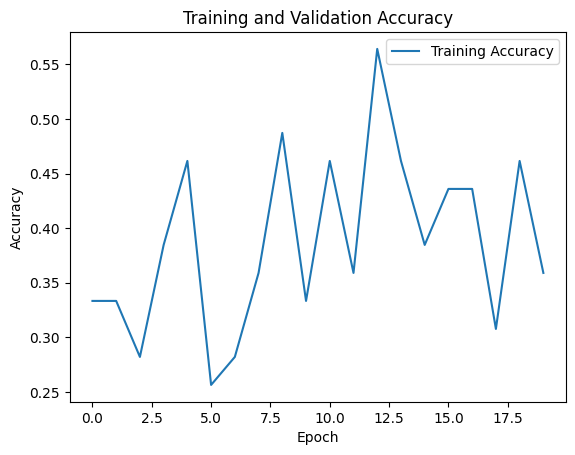

In [23]:
# Plot the training and validation Accuracy curves
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

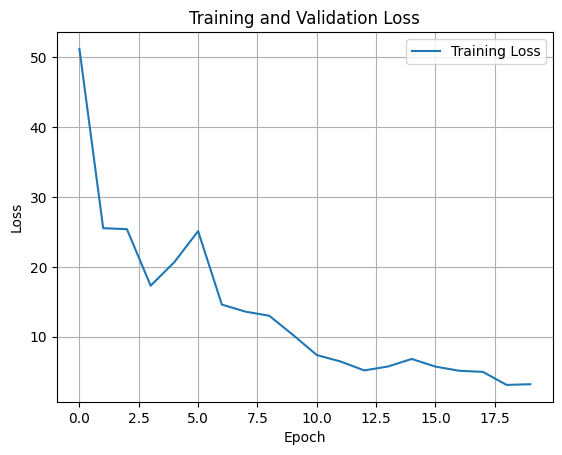

In [24]:
# Plot the training and validation loss curves
plt.plot(history.history['loss'], label='Training Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

In [25]:
# Load the trained model
model = load_model('cat_face.h5')  # Replace with the path to your trained model file


In [26]:
# Make predictions on the test data
predictions = model.predict(test_generator)
# 'predictions' will contain the predicted probabilities for each class for each sample in the test data



3/3 [==============================] - 0s 14ms/step


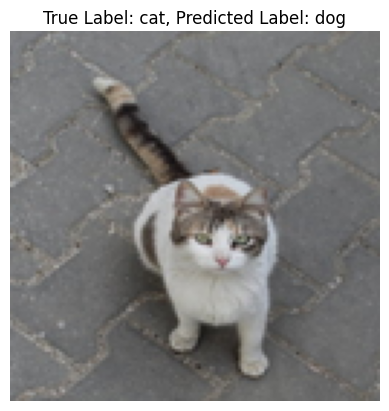

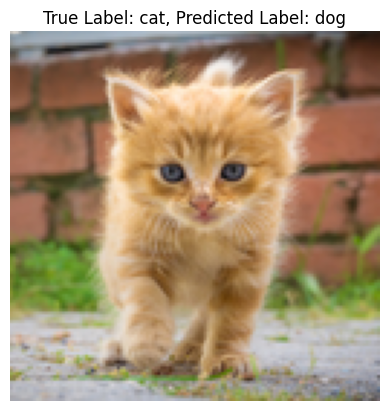

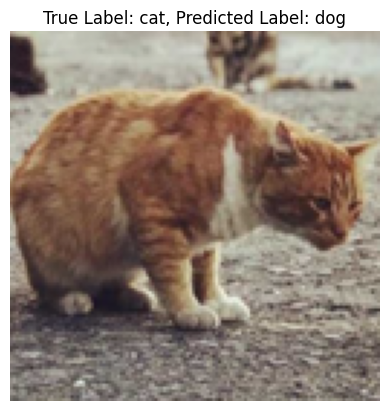

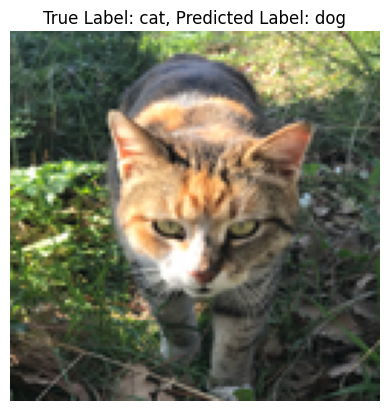

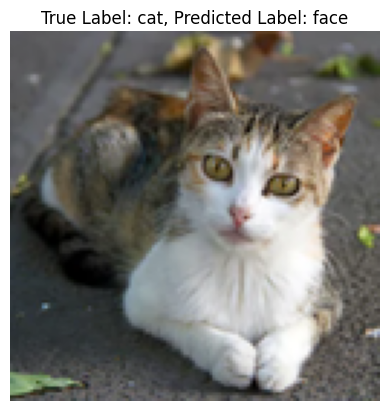

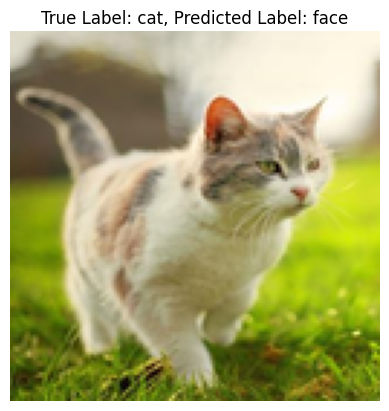

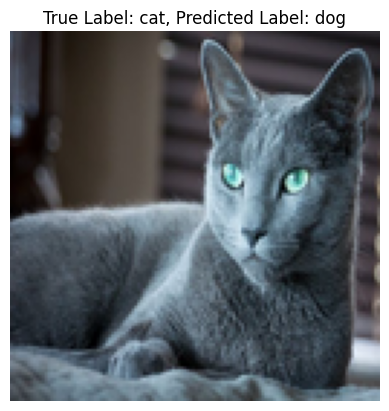

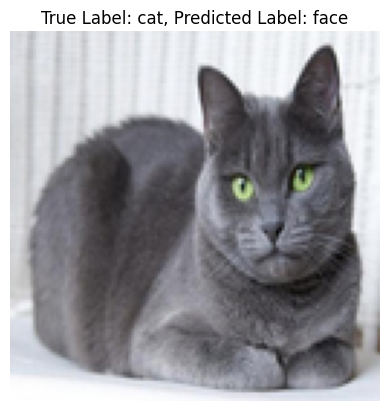

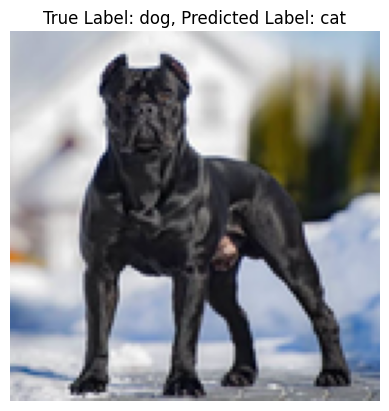

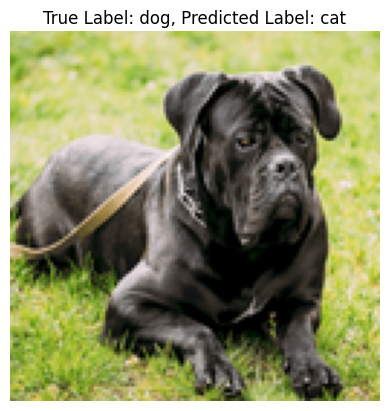

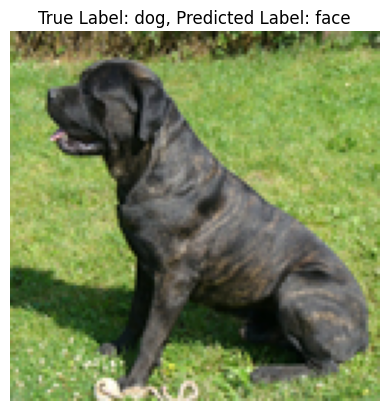

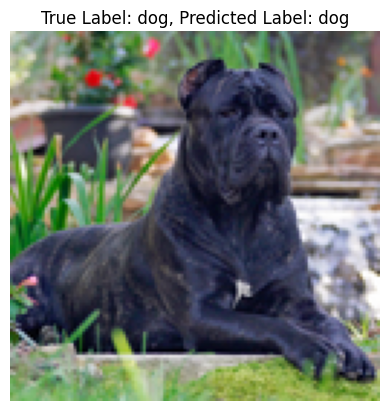

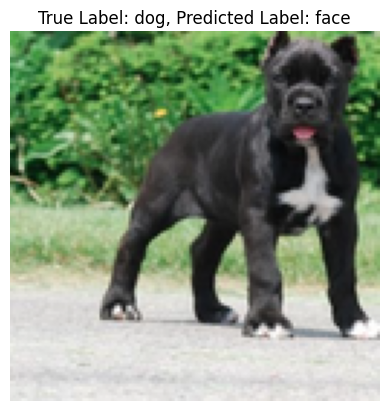

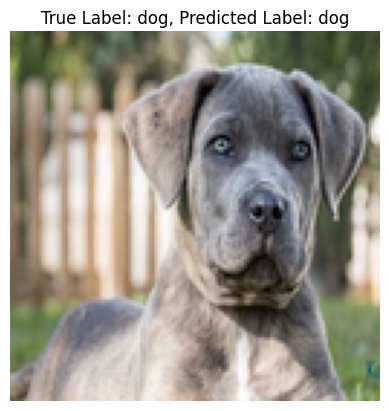

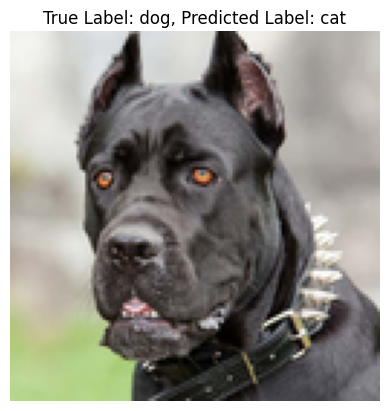

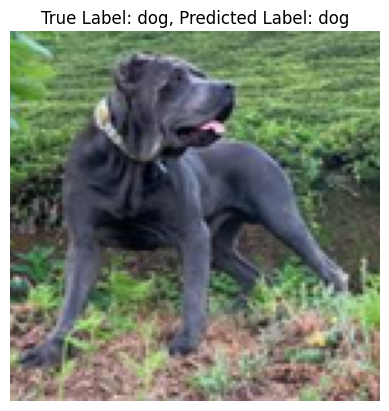

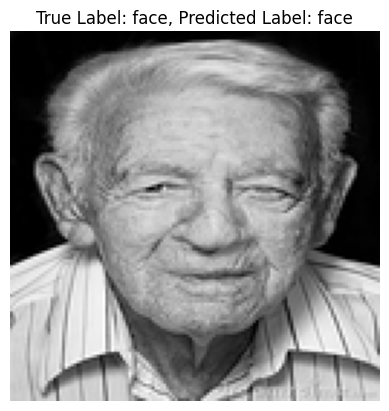

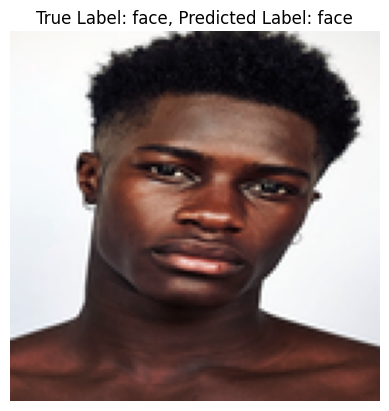

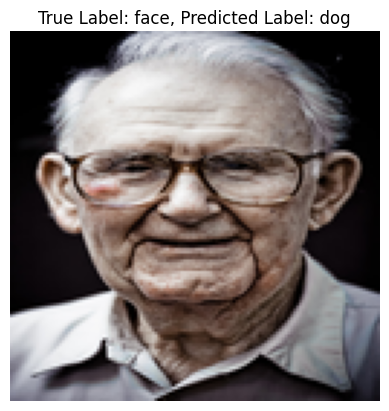

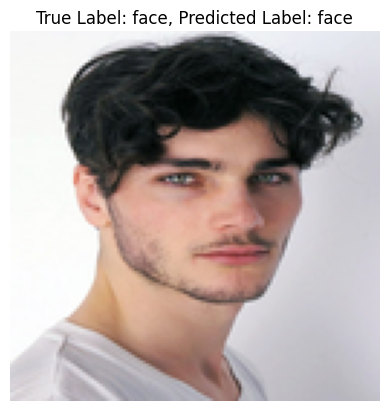

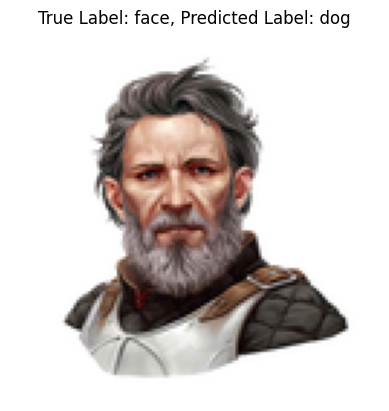

In [29]:
from tensorflow.keras.preprocessing import image
# Retrieve the true class labels
true_labels = test_generator.classes

# Get the class labels
class_labels = list(test_generator.class_indices.keys())

# Display the first few images with true and predicted labels
for i in range(20):  # Display the first 5 images (you can change this number)
    plt.figure()
    plt.imshow(image.load_img(os.path.join(test_dir, test_generator.filenames[i])))
    plt.title(f"True Label: {class_labels[true_labels[i]]}, Predicted Label: {class_labels[np.argmax(predictions[i])]}")
    plt.axis('off')
    plt.show()
